Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the data from csv file to Pandas DataFrame
big_mart_data = pd.read_csv("/Users/bunty/Downloads/Big_Mart-main/Train.csv")

In [3]:
# first 5 rows of the dataframe
big_mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [4]:
# number of data points & number of features
big_mart_data.shape

(8523, 12)

In [5]:
big_mart_data.drop(labels =['Item_Identifier','Item_Visibility','Item_Type','Outlet_Identifier' , 'Outlet_Establishment_Year','Outlet_Location_Type', 'Outlet_Type'], axis = 1 , inplace =True )

Categorical Features:
- Item_Identifier
- Item_Fat_Content
- Item_Type
- Outlet_Identifier
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [6]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Weight          1463
Item_Fat_Content        0
Item_MRP                0
Outlet_Size          2410
Item_Outlet_Sales       0
dtype: int64

Handling Missing Values

Mean --> average

Mode --> more repeated value

In [7]:
# mean value of "Item_Weight" column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [8]:
# filling the missing values in "Item_weight column" with "Mean" value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True)

In [9]:
# mode of "Outlet_Size" column
big_mart_data['Outlet_Size'].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [10]:
# filling the missing values in "Outlet_Size" column with Mode
mode_of_Outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns='Item_Fat_Content', aggfunc=(lambda x: x.mode()[0]))

In [11]:
miss_values = big_mart_data['Outlet_Size'].isnull()

In [12]:
big_mart_data.loc[miss_values, 'Outlet_Size'] = big_mart_data.loc[miss_values,'Item_Fat_Content'].apply(lambda x: mode_of_Outlet_size[x])

In [13]:
# checking for missing values
big_mart_data.isnull().sum()

Item_Weight          0
Item_Fat_Content     0
Item_MRP             0
Outlet_Size          0
Item_Outlet_Sales    0
dtype: int64

Data Analysis

In [14]:
big_mart_data.describe()

,Item_Weight,Item_MRP,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000
mean,12.857645,140.992782,2181.288914
std,4.226124,62.275067,1706.499616
min,4.555000,31.290000,33.290000
25%,9.310000,93.826500,834.247400
50%,12.857645,143.012800,1794.331000
75%,16.000000,185.643700,3101.296400
max,21.350000,266.888400,13086.964800


Numerical Features

In [15]:
sns.set()

C:\Users\91788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


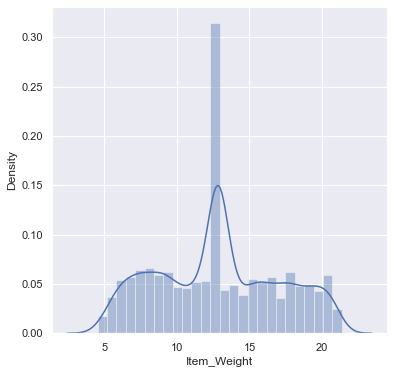

In [16]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

C:\Users\91788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


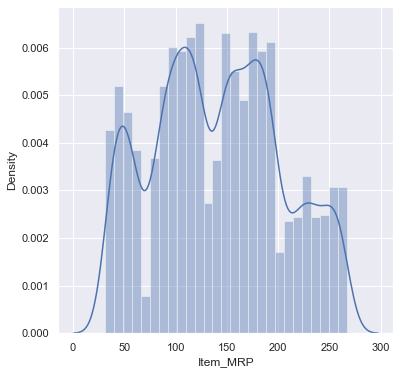

In [17]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

C:\Users\91788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


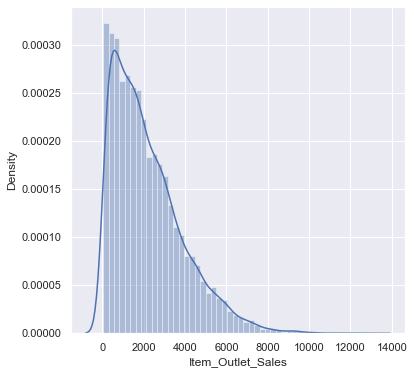

In [18]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

Categorical Features

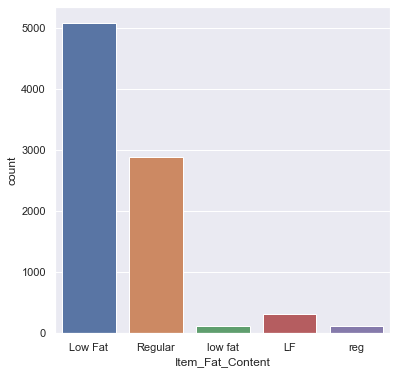

In [19]:
# Item_Fat_Content column
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()

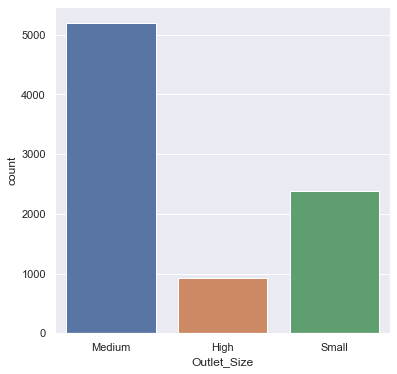

In [20]:
# Outlet_Size column
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.show()

Data Pre-Processing

In [21]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.30,Low Fat,249.8092,Medium,3735.1380
1,5.92,Regular,48.2692,Medium,443.4228
2,17.50,Low Fat,141.6180,Medium,2097.2700
3,19.20,Regular,182.0950,Medium,732.3800
4,8.93,Low Fat,53.8614,High,994.7052


In [22]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [23]:
big_mart_data.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [24]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

Label Encoding

In [25]:
encoder = LabelEncoder()

In [26]:
#big_mart_data['Item_Fat_Content'] = encoder.fit_transform(big_mart_data['Item_Fat_Content'])
#big_mart_data['Outlet_Size'] = encoder.fit_transform(big_mart_data['Outlet_Size'])

In [27]:
big_mart_data.replace({'Item_Fat_Content': {'Regular': 1 , 'Low Fat' :0}} ,inplace =True)
big_mart_data.replace({'Outlet_Size': {'Small': 0 , 'Medium' : 1, 'High' : 2}} ,inplace =True)

In [28]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.30,0,249.8092,1,3735.1380
1,5.92,1,48.2692,1,443.4228
2,17.50,0,141.6180,1,2097.2700
3,19.20,1,182.0950,1,732.3800
4,8.93,0,53.8614,2,994.7052


In [29]:
big_mart_data.tail()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Outlet_Sales
8518,6.865,0,214.5218,2,2778.3834
8519,8.380,1,108.1570,1,549.2850
8520,10.600,0,85.1224,0,1193.1136
8521,7.210,1,103.1332,1,1845.5976
8522,14.800,0,75.4670,0,765.6700


Splitting features and Target

In [30]:
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [31]:
print(X)

      Item_Weight  Item_Fat_Content  Item_MRP  Outlet_Size
0           9.300                 0  249.8092            1
1           5.920                 1   48.2692            1
2          17.500                 0  141.6180            1
3          19.200                 1  182.0950            1
4           8.930                 0   53.8614            2
...           ...               ...       ...          ...
8518        6.865                 0  214.5218            2
8519        8.380                 1  108.1570            1
8520       10.600                 0   85.1224            0
8521        7.210                 1  103.1332            1
8522       14.800                 0   75.4670            0

[8523 rows x 4 columns]


In [32]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [33]:
big_mart_data.head()

,Item_Weight,Item_Fat_Content,Item_MRP,Outlet_Size,Item_Outlet_Sales
0,9.30,0,249.8092,1,3735.1380
1,5.92,1,48.2692,1,443.4228
2,17.50,0,141.6180,1,2097.2700
3,19.20,1,182.0950,1,732.3800
4,8.93,0,53.8614,2,994.7052


Splitting the data into Training data & Testing Data

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [35]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 4) (6818, 4) (1705, 4)


Machine Learning Model Training

XGBoost Regressor

In [36]:
regressor = XGBRegressor()

In [37]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

Evaluation

In [38]:
# prediction on training data
training_data_prediction = regressor.predict(X_train)

In [39]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [40]:
print('R Squared value = ', r2_train)

R Squared value =  0.7509906812467849


In [41]:
# prediction on test data
test_data_prediction = regressor.predict(X_test)

In [42]:
# R squared Value
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [43]:
print('R Squared value = ', r2_test)

R Squared value =  0.4124966526935312


In [44]:
input_data= (9.3,0,250.2,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[2526.5098]


In [45]:
import pickle
filename = 'Big_mart.sav'
pickle.dump(regressor , open(filename, 'wb'))

loaded_model = pickle.load(open('Big_mart.sav', 'rb'))

In [46]:
input_data= (9.3,0,250.2,1)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

[2526.5098]
